# $Nguyen$ $Hoang$ $Anh$ $Tu$
# $ITDSIU20090$
# $$FINAL$$

# Problem 3:

$Import$ $dataset$

In [64]:
mm = read.table('C:/Users/Admin/OneDrive/Máy tính/Sem 2/RA/pro3.txt', col.names = c('Y', 'X'))
head(mm)

Y,X
106,43
106,41
97,47
113,46
96,45
119,41


In [65]:
attach(mm)

The following object is masked _by_ .GlobalEnv:

    X

The following objects are masked from mm (pos = 3):

    X, Y

The following objects are masked from mm (pos = 4):

    X, Y

The following object is masked from fs:

    Y

The following object is masked from jp (pos = 7):

    Y

The following objects are masked from mm (pos = 8):

    X, Y

The following object is masked from jp (pos = 9):

    Y

The following objects are masked from mm (pos = 10):

    X, Y



## a. 

In [4]:
X_sq = (mm$X)^2
data = cbind(mm, mm$X, X_sq)

In [66]:
model = lm(Y ~ X + X_sq, data = data)
summary(model)


Call:
lm(formula = Y ~ X + X_sq, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.086  -6.154  -1.088   6.220  20.578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.349608  29.225118   7.095 2.21e-09 ***
X            -2.964323   1.003031  -2.955  0.00453 ** 
X_sq          0.014840   0.008357   1.776  0.08109 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.026 on 57 degrees of freedom
Multiple R-squared:  0.7632,	Adjusted R-squared:  0.7549 
F-statistic: 91.84 on 2 and 57 DF,  p-value: < 2.2e-16


$$\hat{Y} = 207.349608 - 2.964323*X + 0.014840*X^2$$

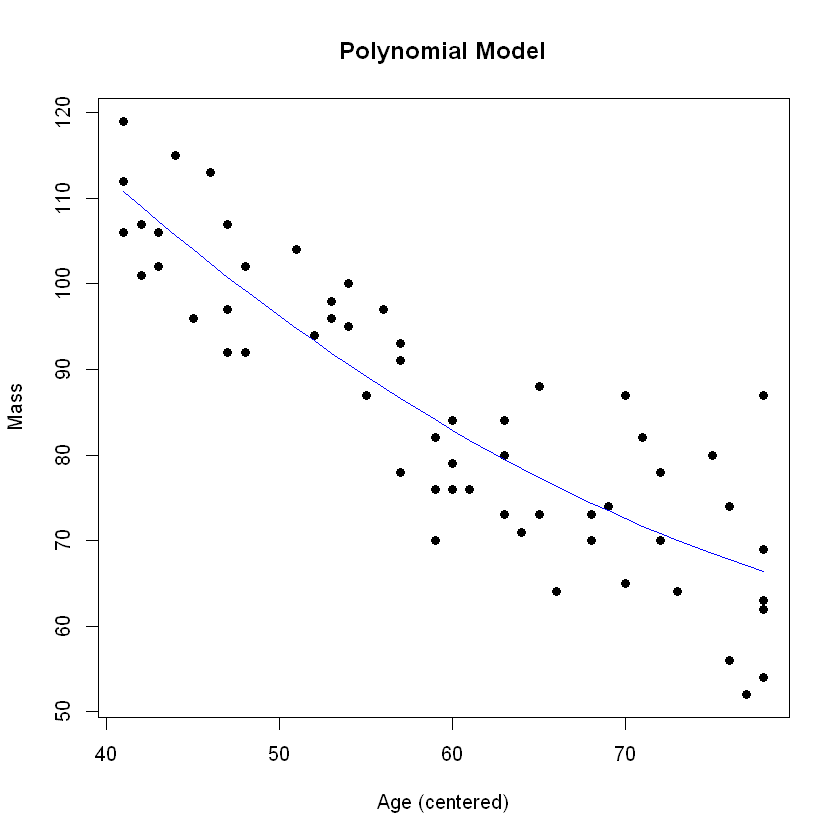

In [8]:
plot(X, Y, main="Polynomial Model", xlab="Age (centered)", ylab="Mass", pch=19) 
x = sort(mm$X)
y = 207.349608 - 2.964323*x + 0.014840*x^2
lines( x, y , col="blue") 

The quadratic function does appear to be a good fit.

In [11]:
R_sq = 1 - 3671.3126/(3671.3126 + 203.1349+11627.4858)
R_sq

[1] 0.7631707

In [10]:
anova(model)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X,1,11627.4858,11627.48584,180.525814,2.594561e-19
X_sq,1,203.1349,203.13491,3.153828,8.108690e-02
Residuals,57,3671.3126,64.40899,NA,NA


$R^2$ = .7632 or 76.32%

## b.

$Use$ $F$ $Test$

In [12]:
p = 3
n = nrow(mm)
SSR = 11627.4858 + 203.1349
SSE = 3671.3126
MSR = SSR / (p - 1)
MSE = SSE / (n - p)

In [13]:
F_star = MSR/MSE
F_star

[1] 91.83982

In [14]:
alpha = 0.02
F = qf(1 - alpha, p - 1, n - p)
F

[1] 4.193231

We have $F^* > F(0.98, 2, 57)$, so we reject the null hypothesis and conclude the alternative hypothesis that $\beta_1$ and $\beta_{11} \neq 0$

$P-value$

In [21]:
summary(model)


Call:
lm(formula = Y ~ X + X_sq, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.086  -6.154  -1.088   6.220  20.578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.349608  29.225118   7.095 2.21e-09 ***
X            -2.964323   1.003031  -2.955  0.00453 ** 
X_sq          0.014840   0.008357   1.776  0.08109 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.026 on 57 degrees of freedom
Multiple R-squared:  0.7632,	Adjusted R-squared:  0.7549 
F-statistic: 91.84 on 2 and 57 DF,  p-value: < 2.2e-16


We can see that the p-value < 2.2e-16 < $\alpha = 0.05$. Therefore, we reject $H_0$ and conclude $H_a$

## c.

In [67]:
xi_new = 48 
xi_new_sq = (xi_new)^2

In [68]:
Y_interval_est_1 = predict(model, data.frame(X = xi_new, X_sq = xi_new_sq), 
                           interval="confidence", level=0.95)
Y_interval_est_1

fit,lwr,upr
99.25461,96.28436,102.2249


### The confident interval of the mean muscle mass for women aged 48 years with 95% confident is between 96.28436 and 102.2249

## d.

In [69]:
Y_interval_est_2 = predict(model, data.frame(X = xi_new, X_sq = xi_new_sq), 
                           interval="prediction", level=0.95)
Y_interval_est_2

fit,lwr,upr
99.25461,82.9116,115.5976


### The prediction interval of the muscle mass for women aged 48 years with 95% confident is between 82.9116	 and 115.5976

## e.

In [28]:
vcov(model)

,(Intercept),X,X_sq
(Intercept),854.1075094,-29.164571446,0.2399973719
X,-29.1645714,1.006071636,-0.0083491864
X_sq,0.2399974,-0.008349186,0.0000698327


In [29]:
b_xi_sq = coef(model)[3]
b_xi_sq

s_xi_sq = sqrt(0.0000698327)
s_xi_sq

X_sq 
0.0148405

[1] 0.008356596

In [30]:
t_star = b_xi_sq / s_xi_sq
t_star

X_sq 
1.775902

In [31]:
alpha = 0.02
t = qt(1 - alpha/2, n - p)
t

[1] 2.393568

### Conclude that the coefficient for the quadratic term is not statistically significantly different from 0, so the quadratic term can be dropped from the model without too much loss. Using the decision rule approach, Reject $H_0$ if $|t^*|$ ≥ 2.393567. Because $t^*$ < 2.393567, do not reject $H_0$. 


## f.

In [35]:
X_sq = (mm$X)^2
data = cbind(mm, mm$X, X_sq)

In [36]:
model = lm(Y ~ X + X_sq, data = data)
summary(model)


Call:
lm(formula = Y ~ X + X_sq, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.086  -6.154  -1.088   6.220  20.578 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.349608  29.225118   7.095 2.21e-09 ***
X            -2.964323   1.003031  -2.955  0.00453 ** 
X_sq          0.014840   0.008357   1.776  0.08109 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.026 on 57 degrees of freedom
Multiple R-squared:  0.7632,	Adjusted R-squared:  0.7549 
F-statistic: 91.84 on 2 and 57 DF,  p-value: < 2.2e-16


# Problem 4:

$Import$ $dataset$

In [37]:
jp = read.table('C:/Users/Admin/OneDrive/Máy tính/Sem 2/RA/pro4.txt', col.names = c('Y', 'X1', 'X2', 'X3', 'X4'))
head(jp)

Y,X1,X2,X3,X4
88,86,110,100,87
80,62,97,99,100
96,110,107,103,103
76,101,117,93,95
80,100,101,95,88
73,78,85,95,84


In [38]:
attach(jp)

The following object is masked from mm (pos = 3):

    Y

The following objects are masked from jp (pos = 4):

    X1, X2, X3, X4, Y

The following object is masked from mm (pos = 5):

    Y



## a.

In [39]:
model = lm(Y~., jp)
summary(model)


Call:
lm(formula = Y ~ ., data = jp)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9779 -3.4506  0.0941  2.4749  5.9959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -124.38182    9.94106 -12.512 6.48e-11 ***
X1             0.29573    0.04397   6.725 1.52e-06 ***
X2             0.04829    0.05662   0.853  0.40383    
X3             1.30601    0.16409   7.959 1.26e-07 ***
X4             0.51982    0.13194   3.940  0.00081 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.099 on 20 degrees of freedom
Multiple R-squared:  0.9629,	Adjusted R-squared:  0.9555 
F-statistic: 129.7 on 4 and 20 DF,  p-value: 5.262e-14


$$\hat{Y} = −124.38 + 0.29573X_1 + 0.04829X_2 + 1.30601X_3 + 0.51982X_4$$

Since only $\beta_2$ isn’t significant (p-value > 0.05) and the F statistics of the overall model is significant, I think all predictor variables should be retained in the model except $\beta_2$ should be considered.

## b.

In [41]:
X = cbind(jp$X1, jp$X2, jp$X3, jp$X4)
library(leaps)

Warning message:
"package 'leaps' was built under R version 3.6.3"

In [42]:
suleaps_aR = leaps(X, jp$Y, method='adjr2')
suleaps_aR

,1,2,3,4
1,FALSE,FALSE,TRUE,FALSE
1,FALSE,FALSE,FALSE,TRUE
1,TRUE,FALSE,FALSE,FALSE
1,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE
2,FALSE,FALSE,TRUE,TRUE
2,TRUE,FALSE,FALSE,TRUE
2,FALSE,TRUE,TRUE,FALSE
2,FALSE,TRUE,FALSE,TRUE
2,TRUE,TRUE,FALSE,FALSE


### Four best subset regression models according to the $R^2_{a,p}$ criterion:
* The best: X1, X3, X4. ($R^2_{a,p}$ = 0.956)
* The second: X1, X2, X3, X4. ($R^2_{a,p}$ = 0.955)
* The third: X1, X3. ($R^2_{a,p}$ = 0.926)
* The fourth: X1, X2, X3. ($R^2_{a,p}$ = 0.924)

# Problem 5: 

$Import$ $dataset$

In [43]:
fs = read.table('C:/Users/Admin/OneDrive/Máy tính/Sem 2/RA/pro5.txt', col.names = c('Y', 'X1', 'X2', 'X3'))
head(fs)

Y,X1,X2,X3
0,59,52,0
0,61,55,1
1,82,51,0
0,51,70,0
0,53,70,0
0,62,49,1


In [44]:
attach(fs)

The following objects are masked from jp (pos = 4):

    X1, X2, X3, Y

The following object is masked from mm (pos = 5):

    Y

The following objects are masked from jp (pos = 6):

    X1, X2, X3, Y

The following object is masked from mm (pos = 7):

    Y



## a.

In [45]:
model = glm(Y ~ X1 + X2 + X3, data = fs,family = binomial())
summary(model)


Call:
glm(formula = Y ~ X1 + X2 + X3, family = binomial(), data = fs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4037  -0.5637  -0.3352  -0.1542   2.9394  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.17716    2.98242  -0.395  0.69307   
X1           0.07279    0.03038   2.396  0.01658 * 
X2          -0.09899    0.03348  -2.957  0.00311 **
X3           0.43397    0.52179   0.832  0.40558   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 134.94  on 158  degrees of freedom
Residual deviance: 105.09  on 155  degrees of freedom
AIC: 113.09

Number of Fisher Scoring iterations: 6


In [46]:
b0 = coef(model)[1]
b1 = coef(model)[2]
b2 = coef(model)[3]
b3 = coef(model)[4]

Fitted response function $P\{Y = 1\} = \pi = \frac{1}{(1 + exp(1.17716 - 0.07279X_1 + 0.09899X_2 - 0.43397X_3))}$

In [47]:
# The fitted response function.
pi = exp(b0 + b1*X1 + b2*X2 + b3*X3)/(1 + exp(b0 + b1*X1 + b2*X2 + b3*X3)) # or pi = (1 + exp(-b0 - b1*X1 - b2*X2 - b3*X3))^(-1)
pi

[1] 0.116092633 0.148378918 0.436137484 0.012200234 0.014085151 0.253380107
  [7] 0.020611817 0.270261986 0.118223972 0.077196655 0.153578467 0.067443718
 [13] 0.085446617 0.021204448 0.004883930 0.117905957 0.265084315 0.010564859
 [19] 0.029394189 0.007669850 0.049189976 0.047326991 0.035600345 0.004870567
 [25] 0.153220907 0.004451342 0.247373204 0.029222838 0.244104053 0.172639165
 [31] 0.060811495 0.085668700 0.381360486 0.146190859 0.041869350 0.010294482
 [37] 0.707732238 0.317265075 0.204690239 0.098313422 0.192192037 0.048649583
 [43] 0.195343833 0.044761574 0.185477937 0.043654646 0.013299328 0.184155716
 [49] 0.007219553 0.014536592 0.069110264 0.018384571 0.195343833 0.124727973
 [55] 0.064038663 0.025364266 0.069287602 0.029472841 0.626610285 0.165704710
 [61] 0.582808370 0.010030955 0.172639165 0.061144024 0.004140143 0.427609251
 [67] 0.005710520 0.074545636 0.208988151 0.214328395 0.022898562 0.088448250
 [73] 0.084101516 0.215809947 0.598946586 0.253901317 0.325559069 0.048919072
 [79] 0.181143798 0.120052303 0.051415320 0.165312660 0.194432613 0.105216171
 [85] 0.051132819 0.520973395 0.150203693 0.158180190 0.076783965 0.322365112
 [91] 0.570015851 0.018599290 0.492593713 0.127932670 0.092277264 0.054639590
 [97] 0.360267461 0.187239069 0.661963019 0.041058934 0.233032453 0.138001277
[103] 0.120052303 0.100135912 0.006637667 0.011452409 0.014831610 0.008912258
[109] 0.211409238 0.042811219 0.162114507 0.007135252 0.196292293 0.181552549
[115] 0.091308978 0.147619447 0.016635718 0.010294482 0.009691599 0.132576808
[121] 0.013263247 0.028252733 0.164873728 0.088935060 0.412707163 0.058844384
[127] 0.093765308 0.094993359 0.141173560 0.270261986 0.048522313 0.128264257
[133] 0.135618745 0.555695776 0.039482931 0.192192037 0.053595823 0.247373204
[139] 0.017562386 0.085901533 0.190395231 0.049746248 0.095256248 0.088448250
[145] 0.502788676 0.056784821 0.051699297 0.048791133 0.271408853 0.017562386
[151] 0.093272996 0.108002156 0.033837480 0.055542059 0.050719063 0.025727294
[157] 0.931566311 0.646766998 0.274302309

## b.

In [48]:
OR1 = exp(b1)
OR1

X1 
1.075503

The additional increase in odds ratio when increase X1 by one unit while X2, X3 unchange.

In [50]:
OR2 = exp(b2)
OR2

X2 
0.9057549

The additional increase in odds ratio when increase X2 by one unit while X1, X3 unchange.

In [51]:
OR3 = exp(b3)
OR3

X3 
1.54338

The additional increase in odds ratio when increase X3 by one unit while X1, X2 unchange.

## c.

In [52]:
est_p = 1/(1 + exp(-b0 - b1*55 - b2*60 - b3*1))
est_p

(Intercept) 
 0.06422197

There is 6.4% that the male clients will receive a flu shot.